<a href="https://colab.research.google.com/github/ak55634/Assignment-Visualization/blob/main/LLM_Assignment_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install datasets
!pip install faker


In [ ]:
import pandas as pd
import random
from faker import Faker

fake = Faker()


def generate_synthetic_data(num_samples=1000):
    data = []
    for _ in range(num_samples):
        # Randomize patient details
        age = random.randint(18, 90)
        gender = random.choice(['Male', 'Female'])
        medical_history = random.choice(['None', 'Hypertension', 'Diabetes', 'Asthma', 'Heart Disease'])

        # Randomize symptoms
        symptoms = random.sample(
            ['Chest Pain', 'Shortness of Breath', 'Dizziness', 'Cough', 'Fever', 'Fatigue', 'Headache'],
            random.randint(1, 3)
        )

        # Randomize vitals
        heart_rate = random.randint(60, 120)
        blood_pressure = f"{random.randint(90, 180)}/{random.randint(60, 120)}"
        temperature = round(random.uniform(35.0, 40.0), 1)
        oxygen_level = random.randint(90, 100)

        # Assign triage level based on symptoms and vitals
        triage_category = 'Green'  # Default to lowest priority
        if 'Chest Pain' in symptoms and 'Shortness of Breath' in symptoms:
            triage_category = 'Red'
        elif 'Fever' in symptoms and 'Cough' in symptoms:
            triage_category = 'Yellow'
        elif 'Headache' in symptoms:
            triage_category = 'Green'
        else:
            triage_category = 'Blue'

        data.append({
            'Age': age,
            'Gender': gender,
            'Medical History': medical_history,
            'Symptoms': ', '.join(symptoms),
            'Heart Rate': heart_rate,
            'Blood Pressure': blood_pressure,
            'Temperature': temperature,
            'Oxygen Level': oxygen_level,
            'Triage Category': triage_category
        })

    return pd.DataFrame(data)

# synthetic data
df = generate_synthetic_data(1000)
df.head()


,Age,Gender,Medical History,Symptoms,Heart Rate,Blood Pressure,Temperature,Oxygen Level,Triage Category
0,29,Male,Asthma,"Cough, Headache, Fatigue",88,97/96,39.0,96,Green
1,19,Female,Heart Disease,"Headache, Shortness of Breath, Fever",81,126/75,38.7,93,Green
2,43,Male,None,Fatigue,120,116/82,38.8,100,Blue
3,58,Male,Asthma,Dizziness,78,115/110,38.6,94,Blue
4,31,Male,Asthma,"Cough, Fever",100,169/106,38.1,98,Yellow


In [ ]:
!pip install openai==0.28


In [ ]:
import openai
print(openai.__version__)


0.28.0


In [ ]:
pip install transformers


In [ ]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer

# Initialize the model and tokenizer
model_name = "EleutherAI/gpt-neo-1.3B"  # Using a smaller model for better performance
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Set the padding token to avoid warnings
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

def triage_reasoning(symptoms, age, vitals):
    prompt = f"""
    You are a medical assistant helping triage patients in the emergency room.

    Given the patient's symptoms: {symptoms}, age: {age}, and vitals: {vitals}, provide a reasoned triage classification.
    Symptoms: {symptoms}.
    Age: {age}.
    Vitals: {vitals}.

    What should the triage category be and why?
    """

    # Tokenize the input with padding and truncation
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Generate a response
    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,  # Pass the attention mask
        max_length=200,  # Limit the output length
        temperature=0.7,  # Sampling temperature
        do_sample=True,  # Enable sampling for diverse output
        pad_token_id=tokenizer.pad_token_id,  # Use the correct padding token
        num_return_sequences=1,  # Generate a single response
        early_stopping=True  # Stop when the model predicts an end-of-sequence token
    )

    # Decode the response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Example usage
example_symptoms = "Chest Pain, Shortness of Breath"
example_age = 45
example_vitals = "Heart Rate: 100, Blood Pressure: 130/85, Oxygen Level: 95%"
reasoning = triage_reasoning(example_symptoms, example_age, example_vitals)
print(reasoning)


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:679: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


You are a medical assistant helping triage patients in the emergency room.

    Given the patient's symptoms: Chest Pain, Shortness of Breath, age: 45, and vitals: Heart Rate: 100, Blood Pressure: 130/85, Oxygen Level: 95%, provide a reasoned triage classification.
    Symptoms: Chest Pain, Shortness of Breath.
    Age: 45.
    Vitals: Heart Rate: 100, Blood Pressure: 130/85, Oxygen Level: 95%.

    What should the triage category be and why?


In [ ]:
import pandas as pd
import random
from faker import Faker

fake = Faker()


def generate_synthetic_data(num_samples=1000):
    data = []
    for _ in range(num_samples):
        # Randomize patient details
        age = random.randint(18, 90)
        gender = random.choice(['Male', 'Female'])
        medical_history = random.choice(['None', 'Hypertension', 'Diabetes', 'Asthma', 'Heart Disease'])

        # Randomize symptoms
        symptoms = random.sample(
            ['Chest Pain', 'Shortness of Breath', 'Dizziness', 'Cough', 'Fever', 'Fatigue', 'Headache'],
            random.randint(1, 3)
        )

        # Randomize vitals
        heart_rate = random.randint(60, 120)
        blood_pressure = f"{random.randint(90, 180)}/{random.randint(60, 120)}"
        temperature = round(random.uniform(35.0, 40.0), 1)
        oxygen_level = random.randint(90, 100)

        # Assign triage level based on symptoms and vitals
        triage_category = 'Green'  # Default to lowest priority
        if 'Chest Pain' in symptoms and 'Shortness of Breath' in symptoms:
            triage_category = 'Red'
        elif 'Fever' in symptoms and 'Cough' in symptoms:
            triage_category = 'Yellow'
        elif 'Headache' in symptoms:
            triage_category = 'Green'
        else:
            triage_category = 'Blue'

        data.append({
            'Age': age,
            'Gender': gender,
            'Medical History': medical_history,
            'Symptoms': ', '.join(symptoms),
            'Heart Rate': heart_rate,
            'Blood Pressure': blood_pressure,
            'Temperature': temperature,
            'Oxygen Level': oxygen_level,
            'Triage Category': triage_category
        })

    return pd.DataFrame(data)

# Generate and assign the synthetic data to df
df = generate_synthetic_data(1000)

# Now you can use df in the subsequent cells
# ... (your code for training the model) ...

In [ ]:
def predict_triage_with_reasoning(symptoms, age, vitals):
    reasoning = triage_reasoning(symptoms, age, vitals)
    # Extract triage category from reasoning text or directly use the model
    # In a full deployment, you'd combine this with a prediction model
    return reasoning

# Example prediction
symptoms = "Chest Pain, Shortness of Breath"
age = 60
vitals = "Heart Rate: 110, Oxygen Level: 92%"
prediction = predict_triage_with_reasoning(symptoms, age, vitals)
print(prediction)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:679: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


You are a medical assistant helping triage patients in the emergency room.

    Given the patient's symptoms: Chest Pain, Shortness of Breath, age: 60, and vitals: Heart Rate: 110, Oxygen Level: 92%, provide a reasoned triage classification.
    Symptoms: Chest Pain, Shortness of Breath.
    Age: 60.
    Vitals: Heart Rate: 110, Oxygen Level: 92%.

    What should the triage category be and why?
        A.


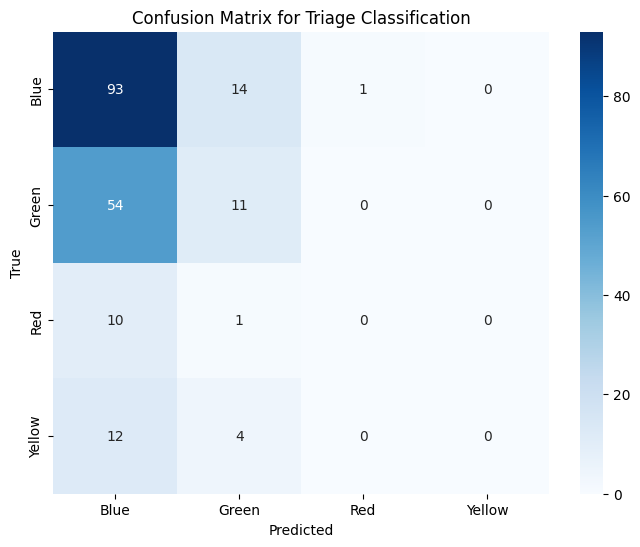

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with the synthetic data
# ... (your previous code to generate df) ...

# Extract features (X) and target (y)
X = df[['Age', 'Heart Rate', 'Temperature', 'Oxygen Level']]  # Choose relevant features
y = df['Triage Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (example: RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Encode target labels for confusion matrix visualization
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)  # Use encoded labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Triage Classification')
plt.show()

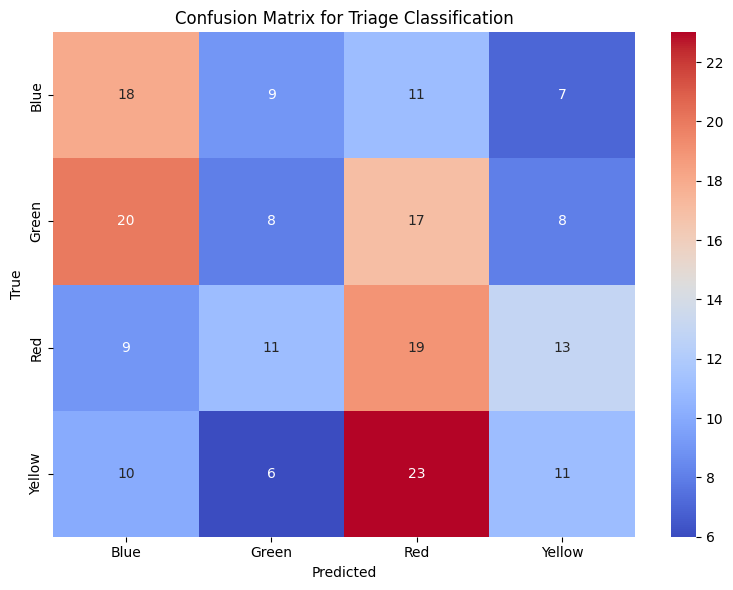

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with the synthetic data
# Extract features (X) and target (y)
X = df[['Age', 'Heart Rate', 'Temperature', 'Oxygen Level']]  # Choose relevant features
y = df['Triage Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (example: RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Encode target labels for confusion matrix visualization
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)  # Use encoded labels

# Customize the heatmap colors
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("coolwarm", as_cmap=True),  # Use a visually appealing "coolwarm" palette
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Triage Classification')
plt.tight_layout()  # Adjust layout for better visibility
plt.show()


In [ ]:
pip install transformers torch scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

   Age  Gender Medical History                               Symptoms  \
0   75    Male            None  Shortness of Breath, Dizziness, Cough   
1   33    Male   Heart Disease  Fever, Shortness of Breath, Dizziness   
2   43  Female          Asthma          Chest Pain, Headache, Fatigue   
3   61    Male            None   Cough, Headache, Shortness of Breath   
4   24    Male    Hypertension                      Chest Pain, Cough   

   Heart Rate Blood Pressure  Temperature  Oxygen Level Triage Category  
0          95         119/61         37.0            92           Green  
1         120        157/105         39.2            92            Blue  
2          68        172/115         38.7            94            Blue  
3          87         171/81         36.8            94             Red  
4         109        144/111         35.6            93           Green  


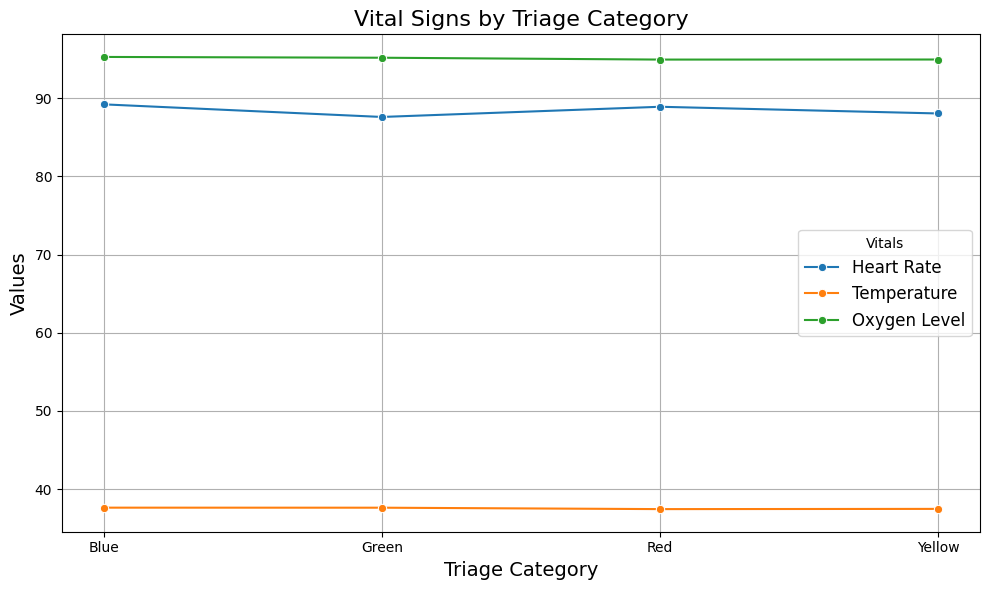

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
from faker import Faker

fake = Faker()

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000):
    data = []
    for _ in range(num_samples):
        # Randomize patient details
        age = random.randint(18, 90)
        gender = random.choice(['Male', 'Female'])
        medical_history = random.choice(['None', 'Hypertension', 'Diabetes', 'Asthma', 'Heart Disease'])

        # Randomize symptoms
        symptoms = random.sample(
            ['Chest Pain', 'Shortness of Breath', 'Dizziness', 'Cough', 'Fever', 'Fatigue', 'Headache'],
            random.randint(1, 3)
        )

        # Randomize vitals
        heart_rate = random.randint(60, 120)
        blood_pressure = f"{random.randint(90, 180)}/{random.randint(60, 120)}"
        temperature = round(random.uniform(35.0, 40.0), 1)
        oxygen_level = random.randint(90, 100)

        # Assign triage category
        triage_category = random.choice(['Green', 'Yellow', 'Red', 'Blue'])

        data.append([age, gender, medical_history, ', '.join(symptoms), heart_rate, blood_pressure, temperature, oxygen_level, triage_category])
    return data

# Generate data and convert to DataFrame
data = generate_synthetic_data(1000)
columns = ['Age', 'Gender', 'Medical History', 'Symptoms', 'Heart Rate', 'Blood Pressure', 'Temperature', 'Oxygen Level', 'Triage Category']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
print(df.head())

# Plot a line plot to visualize trends (LOT diagram-like visualization)
# Aggregating average heart rate, temperature, and oxygen level by Triage Category
aggregated_data = df.groupby('Triage Category')[['Heart Rate', 'Temperature', 'Oxygen Level']].mean().reset_index()

# Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_data, x='Triage Category', y='Heart Rate', marker='o', label='Heart Rate')
sns.lineplot(data=aggregated_data, x='Triage Category', y='Temperature', marker='o', label='Temperature')
sns.lineplot(data=aggregated_data, x='Triage Category', y='Oxygen Level', marker='o', label='Oxygen Level')

# Enhance the visualization
plt.title('Vital Signs by Triage Category', fontsize=16)
plt.xlabel('Triage Category', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(title='Vitals', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [1]:
pip install --upgrade ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
